<a href="https://colab.research.google.com/github/AlyssaPh/-MAT-421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 INTRODUCTION**

The concept of linear algebra include vector, vector space, linear combinations, linear independence, dimension, orthogonality, Eigenvalue, Eigenvector, and algorithm.

In [5]:
import numpy as np
v = np.array([1, 2, 3]) # create a vector
print("Vector: ")
print(v)

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # create a matrix
print("\nMatrix A:")
print(A)

Vector: 
[1 2 3]

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


**1.2 ELEMENTS OF LINEAR ALGEBRA**

*1.2.1 LINAER COMBINATIONS*

In [6]:
B = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
C = A + 3 * B
print("\nLinear combination of A and B:")
print(C)


Linear combination of A and B:
[[28 26 24]
 [22 20 18]
 [16 14 12]]


*1.2.2 Orthogonality*

In [16]:
import numpy as np

def are_orthogonal(vector1, vector2):

    # Convert lists to numpy arrays if they aren't already
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)

    # Calculate the dot product
    dot_product = np.dot(vector1, vector2)

    # Check if the dot product is zero
    return dot_product == 0
# test example
vector1 = [1,0]
vector2 = [2,1]

#call the function and check result
if are_orthogonal(vector1,vector2):
        print("They are orthogonal.")
else:
        print("They are not orthogonal.")

They are not orthogonal.


*1.2.3 GRAM-SCHMIDT PROCESS*

In [20]:
import numpy as np

def gram_schmidt(vectors):
    # Convert the list of vectors into a numpy array for easier manipulation
    vectors = np.array(vectors, dtype=float)

    # Initialize the list of orthogonal vectors
    orthogonal_basis = []

    for i in range(len(vectors)):
        # Start with the current vector
        v = vectors[i]

        # Subtract the projection of v onto all previous orthogonal vectors
        for u in orthogonal_basis:
            projection = np.dot(v, u) / np.dot(u, u) * u
            v = v - projection

        # Add the orthogonalized vector to the basis
        orthogonal_basis.append(v)

    return orthogonal_basis

def normalize_vectors(vectors):
    orthonormal_basis = []
    for v in vectors:
        norm = np.linalg.norm(v)
        if norm > 0:  # Avoid division by zero
            orthonormal_basis.append(v / norm)
    return orthonormal_basis

# Example usage
if __name__ == "__main__":
    # Define a set of linearly independent vectors
    vectors = [
        np.array([1, 1, 1]),
        np.array([1, 0, 1]),
        np.array([0, 1, 1])
    ]

    # Perform the Gram-Schmidt process
    orthogonal_basis = gram_schmidt(vectors)
    print("Orthogonal basis:")
    for v in orthogonal_basis:
        print(v)

    # Normalize the orthogonal basis to get an orthonormal basis
    orthonormal_basis = normalize_vectors(orthogonal_basis)
    print("\nOrthonormal basis:")
    for v in orthonormal_basis:
        print(v)


Orthogonal basis:
[1. 1. 1.]
[ 0.33333333 -0.66666667  0.33333333]
[-5.00000000e-01  5.55111512e-17  5.00000000e-01]

Orthonormal basis:
[0.57735027 0.57735027 0.57735027]
[ 0.40824829 -0.81649658  0.40824829]
[-7.07106781e-01  7.85046229e-17  7.07106781e-01]


*1.2.4 EIGNVALUES AND EIGENVECTOR*

In [19]:

# imports needed to calculate eigenvalue
import numpy as np
from numpy.linalg import eig

a = np.array([[1, 2, 3],
              [1, 6, 10],
              [4, 6, 8]])

# eigenvalue function call
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)


E-value: [15.75366861  0.14177793 -0.89544653]
E-vector [[-0.2316422   0.35678199  0.03532207]
 [-0.7078753  -0.82118009  0.82108736]
 [-0.66727389  0.44538733 -0.56970861]]


*1.3 LINEAR REGRESSION*

LEAST-SQUARES PROBLEMS

[[1.39583118]
 [1.11504763]]


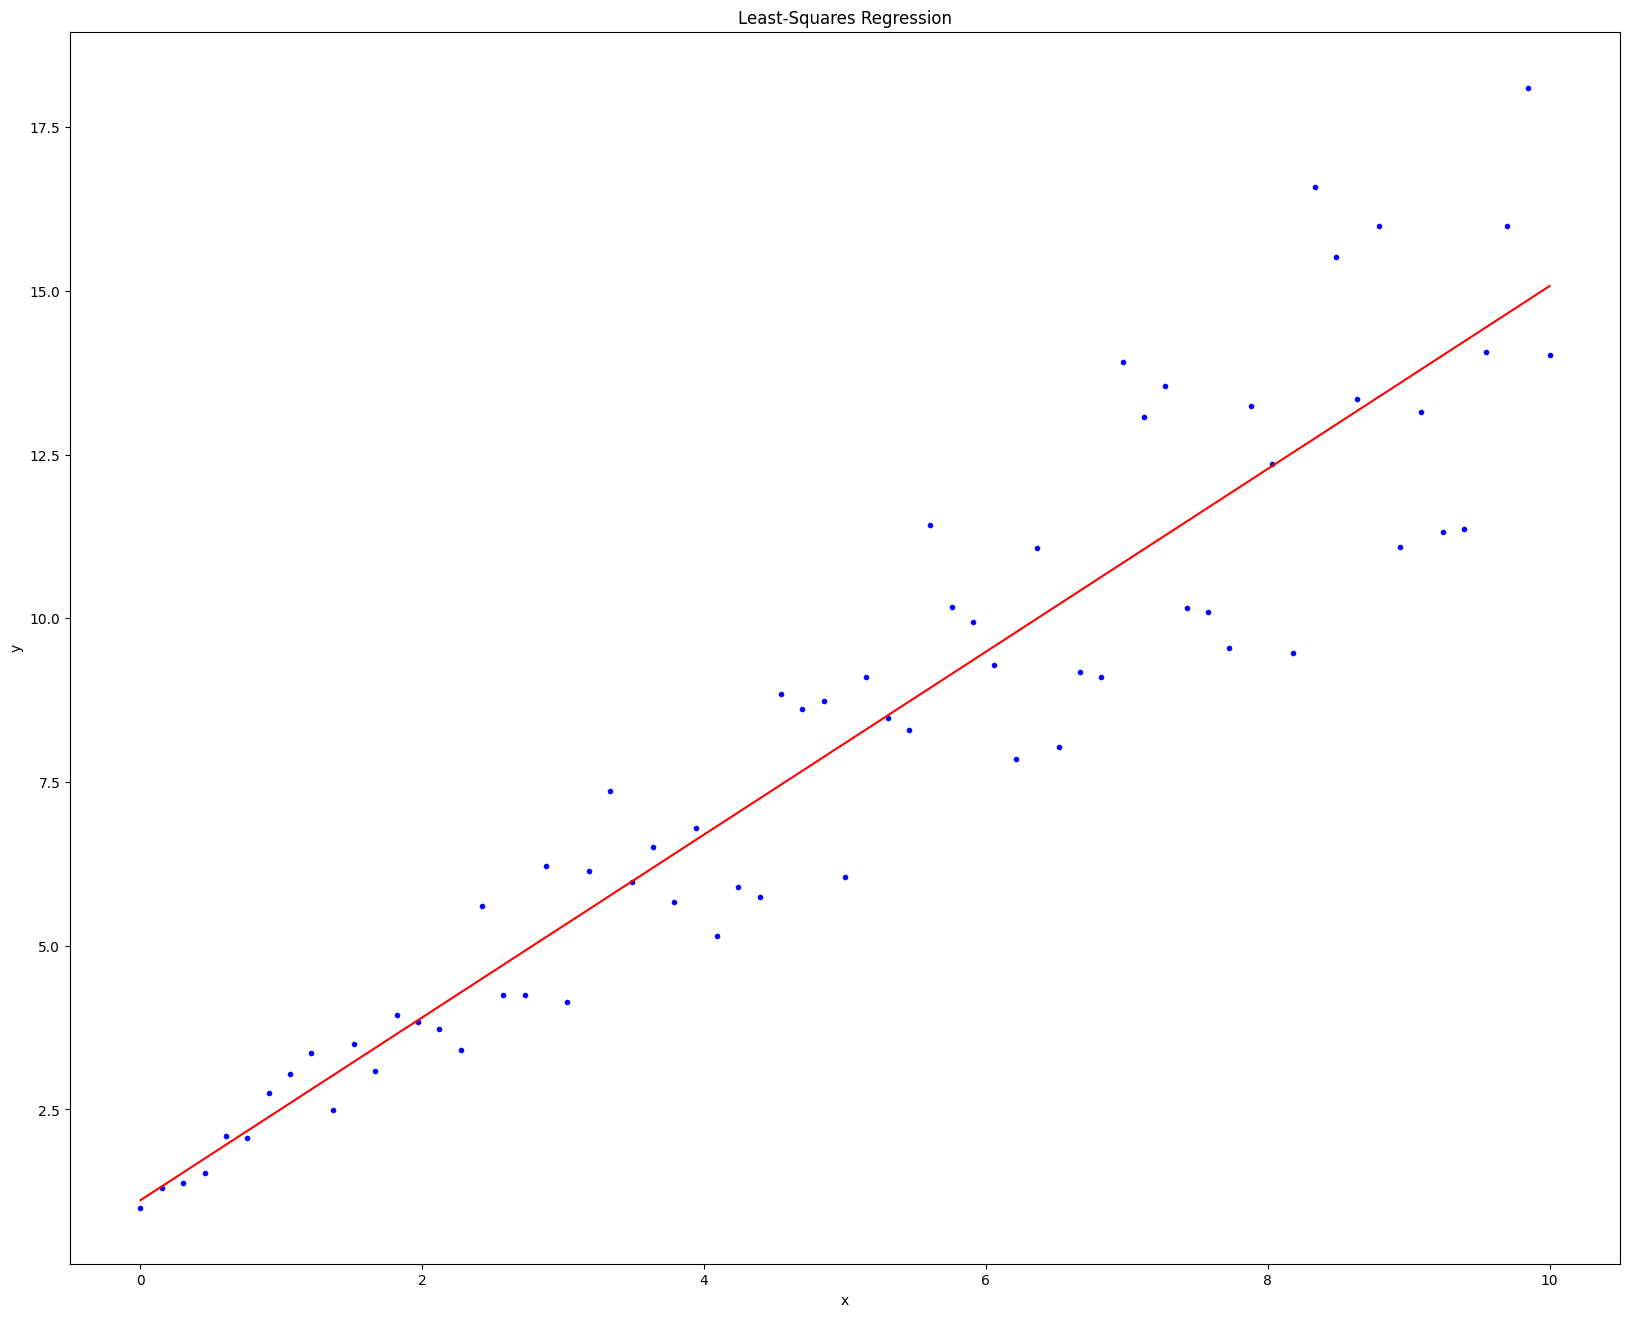

In [26]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# generate x and y
x = np.linspace(0, 10, 67)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

# plot the results
plt.figure(figsize = (20,16))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.title('Least-Squares Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

LINEAR REGRESSION

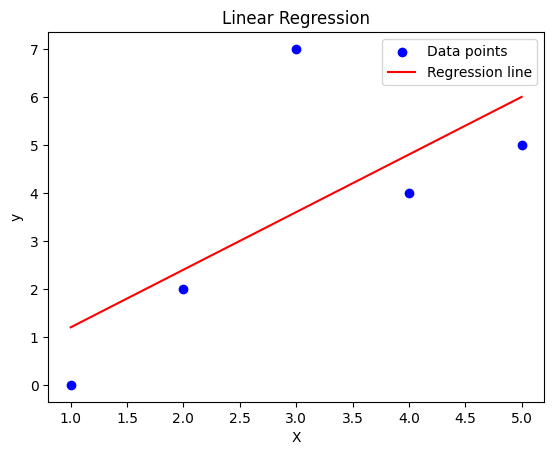

Slope (m): 1.2, Intercept (b): 4.440892098500626e-16


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([0, 2, 7, 4, 5])  # Dependent variable

# Calculate the coefficients (slope and intercept)
n = len(X)
X_mean = np.mean(X)
y_mean = np.mean(y)

# Slope (m) and intercept (b)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
m = numerator / denominator  # Slope
b = y_mean - m * X_mean      # Intercept

# Predictions
y_pred = m * X + b

# Plot the data and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

print(f"Slope (m): {m}, Intercept (b): {b}")